In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file
df=pd.read_csv('C:/Users/91810/Desktop/Data_Analyst_Assignment_Dataset.csv')

In [3]:
df.shape

(24582, 8)

In [4]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [5]:
def calculate_risk(row):
    bounce_string = row['Bounce String']
    # Count the number of bounce occurrences
    bounce_count = bounce_string.count('B') + bounce_string.count('L')
    # Check if bounce occurred in the last month
    last_month_bounce = bounce_string[-1] == 'B' or bounce_string[-1] == 'L'
    
    if 'FEMI' in bounce_string:
        return 'Unknown risk'
    elif bounce_count >= 2 or last_month_bounce:
        return 'High risk'
    elif bounce_count == 1:
        return 'Medium risk'
    else:
        return 'Low risk'


In [6]:
# Apply the function to each row
df['Risk Label'] = df.apply(calculate_risk, axis=1)

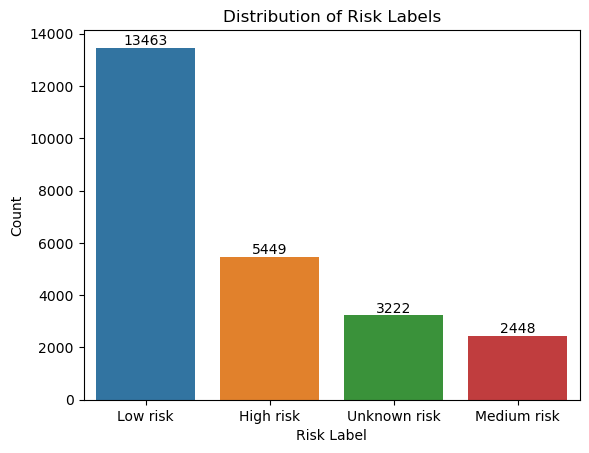

In [7]:
# Visualization
risk_counts = df['Risk Label'].value_counts()
sns.barplot(x=risk_counts.index, y= risk_counts.values)
plt.xlabel('Risk Label')
plt.ylabel('Count')
plt.title('Distribution of Risk Labels')
for i, count in enumerate(risk_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [8]:
# Function to label tenure
def label_tenure(row):
    tenure_left = row['Tenure'] - len(row['Bounce String'])
    if len(row['Bounce String']) <3 or 'FEMI' in row['Bounce String']:
        return 'Early tenure'
    elif tenure_left <= 3:
        return 'Late tenure'
    else:
        return 'Mid tenure'

# Apply the function to each row
df['Tenure Label'] = df.apply(label_tenure, axis=1)

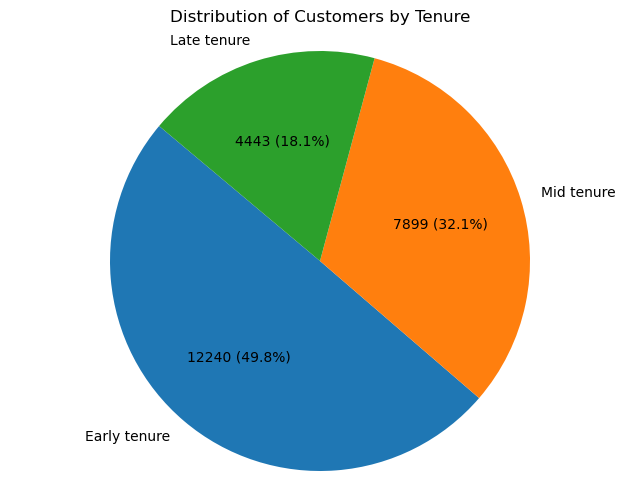

In [9]:
# Calculate value counts for each tenure label
tenure_counts = df['Tenure Label'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(tenure_counts) / 100, p),
        startangle=140)
plt.title('Distribution of Customers by Tenure')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
df.head(20)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low risk,Mid tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High risk,Mid tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High risk,Mid tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low risk,Mid tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High risk,Mid tenure
5,2172,Karnataka,14,4.36,DAKSHINA KANNADA,SSB,29596,T07RO,High risk,Mid tenure
6,1041,Karnataka,10,5.77,BANGALORE RURAL,SSB,10140,Y0M29,High risk,Mid tenure
7,1585,Karnataka,10,6.47,Bangalore,SSS,15390,OE4AV,Low risk,Mid tenure
8,983,Karnataka,11,6.03,DAKSHINA KANNADA,SSS,10494,2MR0X,Low risk,Mid tenure
9,1600,Karnataka,14,4.80,Mysore,SSS,21742,MK67U,Low risk,Mid tenure


In [11]:
df.tail(23)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label
24559,1349,Andhra Pradesh,8,0.0,Krishna,FEMI,10792,SX6WI,Unknown risk,Early tenure
24560,974,Andhra Pradesh,8,0.0,Srikakulam,FEMI,7792,59XNK,Unknown risk,Early tenure
24561,1012,Andhra Pradesh,8,0.0,Visakhapatnam,FEMI,8096,G4VO1,Unknown risk,Early tenure
24562,1949,Andhra Pradesh,8,0.0,Cuddapah,FEMI,15592,KAQT4,Unknown risk,Early tenure
24563,1799,Andhra Pradesh,8,0.0,Chittoor,FEMI,14392,7RV1W,Unknown risk,Early tenure
24564,1087,Andhra Pradesh,8,0.0,Chittoor,FEMI,8696,O6OLB,Unknown risk,Early tenure
24565,1499,Andhra Pradesh,8,0.0,Guntur,FEMI,11992,VMZUQ,Unknown risk,Early tenure
24566,1012,Andhra Pradesh,8,0.0,Cuddapah,FEMI,8096,L1XDZ,Unknown risk,Early tenure
24567,824,Andhra Pradesh,8,0.0,Chittoor,FEMI,6592,PA2Q2,Unknown risk,Early tenure
24568,1540,Andhra Pradesh,8,0.0,Vizianagaram,FEMI,12320,U96G0,Unknown risk,Early tenure


In [12]:
df.columns

Index(['Amount Pending', 'State', 'Tenure', 'Interest Rate', 'City',
       'Bounce String', 'Disbursed Amount', 'Loan Number', 'Risk Label',
       'Tenure Label'],
      dtype='object')

In [13]:
# Sort the DataFrame based on 'Amount Pending'
df_sorted = df.sort_values(by='Amount Pending')

# Calculate the total sum of 'Amount Pending'
total_sum = df_sorted['Amount Pending'].sum()

In [14]:
# Divide the DataFrame into three cohorts with similar sums of 'Amount Pending'
cohort_sum_target = total_sum / 3
cohort_1_sum = 0
cohort_2_sum = 0
cohort_1_idx = 0
cohort_2_idx = 0

for idx, amount in enumerate(df_sorted['Amount Pending']):
    if cohort_1_sum <= cohort_sum_target:
        cohort_1_sum += amount
        cohort_1_idx = idx
    elif cohort_2_sum <= cohort_sum_target:
        cohort_2_sum += amount
        cohort_2_idx = idx
    else:
        break

cohort_1 = df_sorted.iloc[:cohort_1_idx + 1]
cohort_2 = df_sorted.iloc[cohort_1_idx + 1:cohort_2_idx + 1]
cohort_3 = df_sorted.iloc[cohort_2_idx + 1:]

In [15]:
# Assign labels to each cohort
cohort_1['Ticket Size'] = 'Low ticket size'
cohort_2['Ticket Size'] = 'Medium ticket size'
cohort_3['Ticket Size'] = 'High ticket size'

# Concatenate the cohorts back into a single DataFrame
df_final = pd.concat([cohort_1, cohort_2, cohort_3])

C:\Users\91810\AppData\Local\Temp\ipykernel_14692\1936888731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_1['Ticket Size'] = 'Low ticket size'
C:\Users\91810\AppData\Local\Temp\ipykernel_14692\1936888731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2['Ticket Size'] = 'Medium ticket size'
C:\Users\91810\AppData\Local\Temp\ipykernel_14692\1936888731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

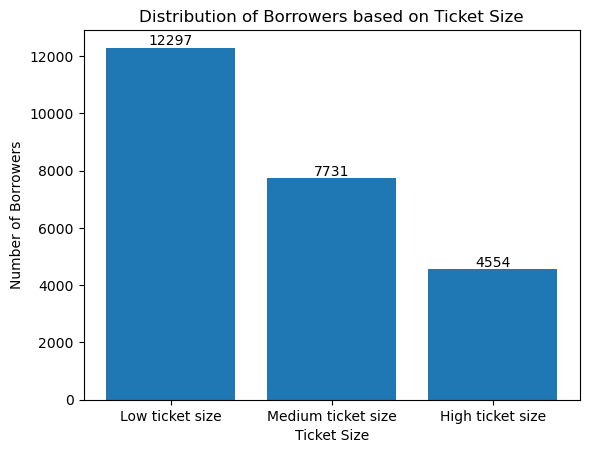

Sum of Amounts in each cohort:
High ticket size: 14674641
Low ticket size: 14678421
Medium ticket size: 14677545


In [16]:
# Visualization
ticket_size_counts = df_final['Ticket Size'].value_counts()

plt.bar(ticket_size_counts.index, ticket_size_counts.values)
plt.xlabel('Ticket Size')
plt.ylabel('Number of Borrowers')
plt.title('Distribution of Borrowers based on Ticket Size')

# Add counts above each bar
for i, count in enumerate(ticket_size_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')  

plt.show()

# Display the sum of amounts for each cohort
print("Sum of Amounts in each cohort:")
for cohort, amount_sum in df_final.groupby('Ticket Size')['Amount Pending'].sum().items():
    print(f"{cohort}: {amount_sum}")

In [17]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low risk,Mid tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High risk,Mid tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High risk,Mid tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low risk,Mid tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High risk,Mid tenure


In [18]:
df.tail()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label
24577,899,Andhra Pradesh,8,0.0,Chittoor,FEMI,7192,EAX5C,Unknown risk,Early tenure
24578,2699,Andhra Pradesh,8,0.0,Krishna,FEMI,21592,5MCE9,Unknown risk,Early tenure
24579,1540,Andhra Pradesh,8,0.0,Krishna,FEMI,12320,9HO4Q,Unknown risk,Early tenure
24580,824,Andhra Pradesh,8,0.0,Guntur,FEMI,6592,3VV72,Unknown risk,Early tenure
24581,2254,Andhra Pradesh,11,0.0,Kurnool,FEMI,24794,18XBC,Unknown risk,Early tenure


In [19]:
df.head(50)

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low risk,Mid tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High risk,Mid tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High risk,Mid tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low risk,Mid tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High risk,Mid tenure
5,2172,Karnataka,14,4.36,DAKSHINA KANNADA,SSB,29596,T07RO,High risk,Mid tenure
6,1041,Karnataka,10,5.77,BANGALORE RURAL,SSB,10140,Y0M29,High risk,Mid tenure
7,1585,Karnataka,10,6.47,Bangalore,SSS,15390,OE4AV,Low risk,Mid tenure
8,983,Karnataka,11,6.03,DAKSHINA KANNADA,SSS,10494,2MR0X,Low risk,Mid tenure
9,1600,Karnataka,14,4.80,Mysore,SSS,21742,MK67U,Low risk,Mid tenure


Whatsapp Bot: We can use Whatsapp bot for borrowers who exhibit great repayment behavior, have first EMIs, or have low EMIs. These borrowers are likely to respond well to automated messages and are less likely to require human intervention.


Voice Bot: Utilize the voice bot for borrowers who  have had low bounce behavior, or have  medium-sized ticket EMIs.

Human Calling: We can use  human calling for scenarios where absolutely necessary. This includes borrowers who have not responded to automated messages, have a history of high bounce behavior.